In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
modified_data = pd.read_csv('term-deposit-marketing-after-outreach-variables.csv')
modified_data = modified_data.drop('y', axis=1)

In [3]:
modified_data.head()

,marital,education,default,housing,loan,contact,duration,age_group,y_encoded,balance_group,job_group,campaign_category_v2,month_period,day_category
0,married,tertiary,no,yes,no,unknown,4.35,age_42_to_60,0,balance_2000_to_4000,management_entrepreneur,campaign_1,mid_year,day_1_to_9
1,single,secondary,no,yes,no,unknown,2.52,age_42_to_60,0,balance_0_to_750,office_support,campaign_1,mid_year,day_1_to_9
2,married,secondary,no,yes,yes,unknown,1.27,age_33_to_42,0,balance_0_to_750,management_entrepreneur,campaign_1,mid_year,day_1_to_9
3,married,unknown,no,yes,no,unknown,1.53,age_42_to_60,0,balance_750_to_2000,manual_labor,campaign_1,mid_year,day_1_to_9
4,single,unknown,no,no,no,unknown,3.30,age_33_to_42,0,balance_0_to_750,not_working,campaign_1,mid_year,day_1_to_9


#### The 'day_category' feature has been found out to have very little distinction for the subscription rates between the different categories, so it might not be that important for the ML classification task.

In [4]:
modified_data = modified_data.drop(columns = ['day_category'], axis=1)

In [5]:
modified_data.head()

,marital,education,default,housing,loan,contact,duration,age_group,y_encoded,balance_group,job_group,campaign_category_v2,month_period
0,married,tertiary,no,yes,no,unknown,4.35,age_42_to_60,0,balance_2000_to_4000,management_entrepreneur,campaign_1,mid_year
1,single,secondary,no,yes,no,unknown,2.52,age_42_to_60,0,balance_0_to_750,office_support,campaign_1,mid_year
2,married,secondary,no,yes,yes,unknown,1.27,age_33_to_42,0,balance_0_to_750,management_entrepreneur,campaign_1,mid_year
3,married,unknown,no,yes,no,unknown,1.53,age_42_to_60,0,balance_750_to_2000,manual_labor,campaign_1,mid_year
4,single,unknown,no,no,no,unknown,3.30,age_33_to_42,0,balance_0_to_750,not_working,campaign_1,mid_year


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#get dummies for categorical variables before splitting
categorical_columns = modified_data.select_dtypes(include=['object']).columns 
numeric_columns = modified_data.select_dtypes(include=[np.number]).columns

# Convert categorical variables to dummy/indicator variables
modified_data = pd.get_dummies(modified_data, columns=categorical_columns, drop_first=True)

# Add 'customer_id' column based on the index
modified_data = modified_data.reset_index().rename(columns={'index': 'customer_id'})

# Split into train and test sets
train_df, test_df = train_test_split(modified_data, test_size=0.2, random_state=42, shuffle=True)

# Reset index for both sets
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [7]:
modified_data.head()

,customer_id,duration,y_encoded,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,...,balance_group_balance_under_0,job_group_manual_labor,job_group_not_working,job_group_office_support,campaign_category_v2_campaign_2,campaign_category_v2_campaign_3,campaign_category_v2_campaign_gt10,campaign_category_v2_campaign_mt3_lt11,month_period_mid_year,month_period_start_year
0,0,4.35,0,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,1,2.52,0,False,True,True,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2,2,1.27,0,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,3,1.53,0,True,False,False,False,True,False,True,...,False,True,False,False,False,False,False,False,True,False
4,4,3.30,0,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [8]:
train_df.head()

,customer_id,duration,y_encoded,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,...,balance_group_balance_under_0,job_group_manual_labor,job_group_not_working,job_group_office_support,campaign_category_v2_campaign_2,campaign_category_v2_campaign_3,campaign_category_v2_campaign_gt10,campaign_category_v2_campaign_mt3_lt11,month_period_mid_year,month_period_start_year
0,19066,3.08,0,True,False,False,True,False,False,False,...,False,False,False,True,True,False,False,False,True,False
1,13625,2.27,0,True,False,True,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
2,34164,2.43,0,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
3,36675,2.90,0,True,False,True,False,False,False,True,...,False,False,True,False,True,False,False,False,True,False
4,2165,6.43,0,False,True,True,False,False,False,True,...,True,False,False,True,True,False,False,False,True,False


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31360 entries, 0 to 31359
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             31360 non-null  int64  
 1   duration                                31360 non-null  float64
 2   y_encoded                               31360 non-null  int64  
 3   marital_married                         31360 non-null  bool   
 4   marital_single                          31360 non-null  bool   
 5   education_secondary                     31360 non-null  bool   
 6   education_tertiary                      31360 non-null  bool   
 7   education_unknown                       31360 non-null  bool   
 8   default_yes                             31360 non-null  bool   
 9   housing_yes                             31360 non-null  bool   
 10  loan_yes                                31360 non-null  bo

In [10]:
test_df.head()

,customer_id,duration,y_encoded,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,...,balance_group_balance_under_0,job_group_manual_labor,job_group_not_working,job_group_office_support,campaign_category_v2_campaign_2,campaign_category_v2_campaign_3,campaign_category_v2_campaign_gt10,campaign_category_v2_campaign_mt3_lt11,month_period_mid_year,month_period_start_year
0,9992,5.32,0,False,True,True,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False
1,28956,1.08,0,False,True,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,True
2,16224,1.30,0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,18492,1.35,0,False,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,24095,25.52,0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7840 entries, 0 to 7839
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             7840 non-null   int64  
 1   duration                                7840 non-null   float64
 2   y_encoded                               7840 non-null   int64  
 3   marital_married                         7840 non-null   bool   
 4   marital_single                          7840 non-null   bool   
 5   education_secondary                     7840 non-null   bool   
 6   education_tertiary                      7840 non-null   bool   
 7   education_unknown                       7840 non-null   bool   
 8   default_yes                             7840 non-null   bool   
 9   housing_yes                             7840 non-null   bool   
 10  loan_yes                                7840 non-null   bool

In [12]:
test_df.to_csv('test_modifed.csv', index=False)

In [13]:
train_df['y_encoded'].value_counts()

y_encoded
0    29090
1     2270
Name: count, dtype: int64

In [14]:
test_df['y_encoded'].value_counts()

y_encoded
0    7264
1     576
Name: count, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler


In [17]:
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, accuracy_score
import numpy as np

# Prepare features and target
X_cls = train_df.drop(['customer_id', 'y_encoded'], axis=1)
y_cls = train_df['y_encoded']

# Split into train and validation sets
X_train_cls, X_val_cls, y_train_cls, y_val_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

### Using recall

In [18]:
# Scale 'duration' feature for train and validation sets
X_train_cls_scaled = X_train_cls.copy()
X_val_cls_scaled = X_val_cls.copy()

scaler2 = StandardScaler()
X_train_cls_scaled = scaler2.fit_transform(X_train_cls)
X_val_cls_scaled = scaler2.transform(X_val_cls)

# Compute class weights
classes = np.unique(y_train_cls)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_cls)
class_weight_dict = dict(zip(classes, class_weights))
sample_weights = y_train_cls.map(class_weight_dict)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [1000, 1500, 2000],
    'max_depth': [3, 5, None],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}

xgb_cls = XGBClassifier(
    random_state=42,
    eval_metric = 'logloss'
)


random_search = RandomizedSearchCV(
    estimator=xgb_cls,
    param_distributions=param_dist,
    n_iter=50,
    scoring='recall',
    n_jobs=4,
    cv=5,
    verbose=1,
    random_state=42
)

random_search.fit(X_train_cls_scaled, y_train_cls, sample_weight=sample_weights)

# Save the best model
joblib.dump(random_search.best_estimator_, 'xgb_cls_model_recall_all_features.joblib')
best_model = joblib.load('xgb_cls_model_recall_all_features.joblib')

# Predict on validation set
y_pred_val = random_search.best_estimator_.predict(X_val_cls_scaled)

print("Best parameters:", random_search.best_params_)
print("Validation recall:", recall_score(y_val_cls, y_pred_val))
print("Validation accuracy:", accuracy_score(y_val_cls, y_pred_val))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.7, 'n_estimators': 1500, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
Validation recall: 0.8237885462555066
Validation accuracy: 0.8411989795918368


C:\Users\samar\AppData\Local\Temp\ipykernel_35168\2419035125.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cls_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')


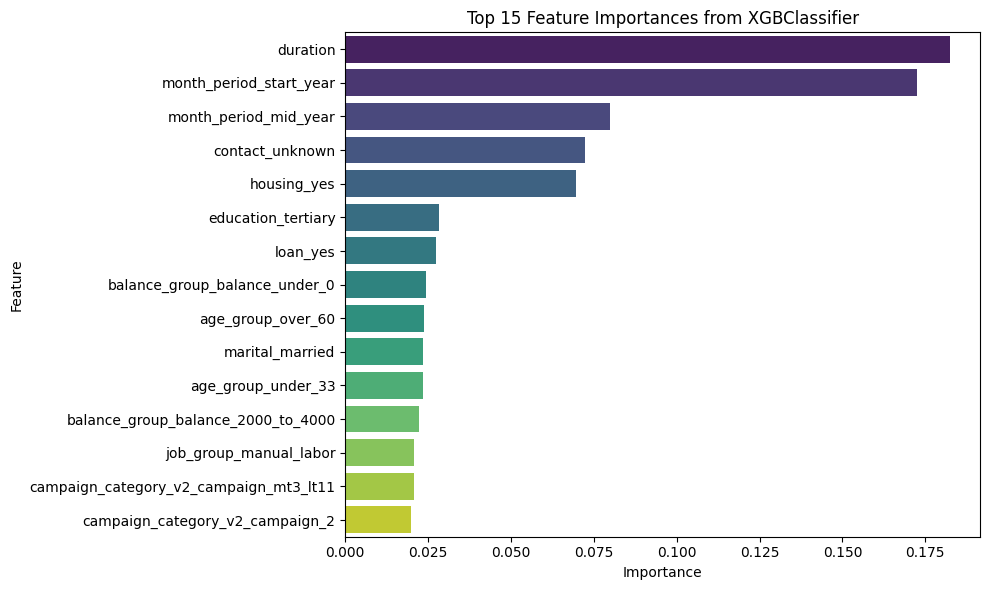

In [19]:
# Get feature importances from the best XGBClassifier model (random_search.best_estimator_)
cls_feature_importances = best_model.feature_importances_
cls_feature_names = X_train_cls.columns

# Create a DataFrame for visualization
cls_feat_imp_df = pd.DataFrame({
    'feature': cls_feature_names,
    'importance': cls_feature_importances
}).sort_values(by='importance', ascending=False)

# Plot the top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(data=cls_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')
plt.title('Top 15 Feature Importances from XGBClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Confusion Matrix:
[[4902  916]
 [  80  374]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      5818
           1       0.29      0.82      0.43       454

    accuracy                           0.84      6272
   macro avg       0.64      0.83      0.67      6272
weighted avg       0.93      0.84      0.87      6272



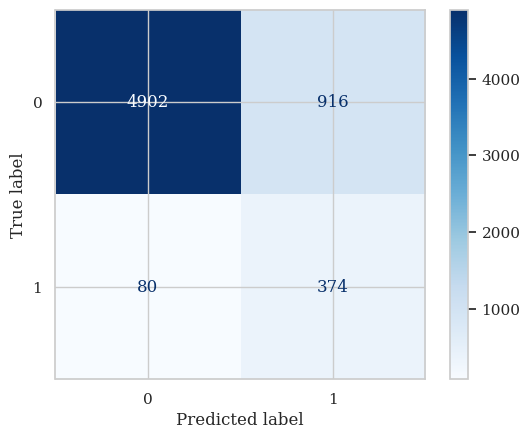

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'serif'

# Save the best model
# joblib.dump(random_search.best_estimator_, 'xgb_cls_best_model.joblib')

# Predict on validation set
y_pred_val_cls = best_model.predict(X_val_cls_scaled)

# Confusion matrix
cm = confusion_matrix(y_val_cls, y_pred_val_cls)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_search.best_estimator_.classes_)
disp.plot(cmap='Blues')
print("Confusion Matrix:")
print(cm)

# Classification report
report = classification_report(y_val_cls, y_pred_val_cls)
print("Classification Report:")
print(report)

In [21]:
# Read the test data
test_data = pd.read_csv('test_modifed.csv')

test_data.head()

,customer_id,duration,y_encoded,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,...,balance_group_balance_under_0,job_group_manual_labor,job_group_not_working,job_group_office_support,campaign_category_v2_campaign_2,campaign_category_v2_campaign_3,campaign_category_v2_campaign_gt10,campaign_category_v2_campaign_mt3_lt11,month_period_mid_year,month_period_start_year
0,9992,5.32,0,False,True,True,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False
1,28956,1.08,0,False,True,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,True
2,16224,1.30,0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,18492,1.35,0,False,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,24095,25.52,0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
# Generate test X data by dropping 'customer_id' and 'day_group' columns if present
test_X = test_data.drop(columns=[col for col in ['customer_id', 'y_encoded'] if col in test_data.columns])

In [28]:
# Read the test data
test_data = pd.read_csv('test_modifed.csv')


# Load the trained XGBClassifier model
xgb_cls_loaded = joblib.load('xgb_cls_model_recall_all_features.joblib')

# Predict classification results
test_data['y_pred'] = xgb_cls_loaded.predict(scaler2.transform(test_X))

# Show the first few predictions
test_data[['customer_id', 'y_pred']].head()

,customer_id,y_pred
0,9992,0
1,28956,1
2,16224,0
3,18492,0
4,24095,1


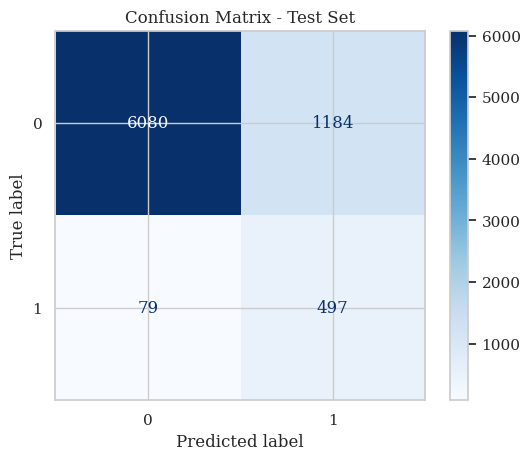

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      7264
           1       0.30      0.86      0.44       576

    accuracy                           0.84      7840
   macro avg       0.64      0.85      0.67      7840
weighted avg       0.94      0.84      0.87      7840



In [29]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Compute confusion matrix and classification report for test set
cm_test = confusion_matrix(test_data['y_encoded'], test_data['y_pred'])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
disp_test.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()

# Print classification report
report_test = classification_report(test_data['y_encoded'], test_data['y_pred'])
print("Classification Report - Test Set:")
print(report_test)

### Using accuracy

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 1500, 'max_depth': None, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8}
Validation recall: 0.43832599118942733
Validation accuracy: 0.9076849489795918


C:\Users\samar\AppData\Local\Temp\ipykernel_35168\1927514185.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cls_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')


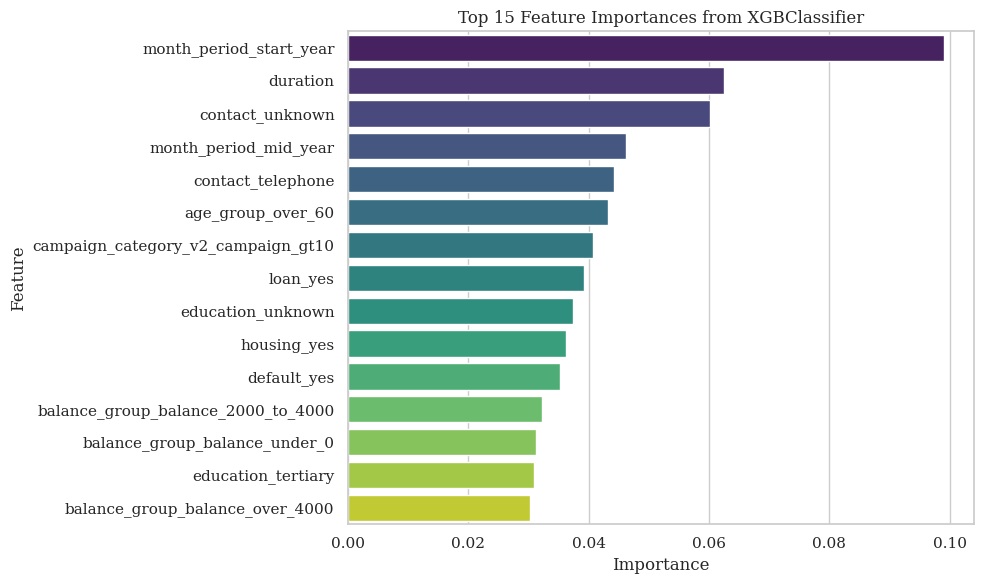

Confusion Matrix:
[[5494  324]
 [ 255  199]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5818
           1       0.38      0.44      0.41       454

    accuracy                           0.91      6272
   macro avg       0.67      0.69      0.68      6272
weighted avg       0.91      0.91      0.91      6272



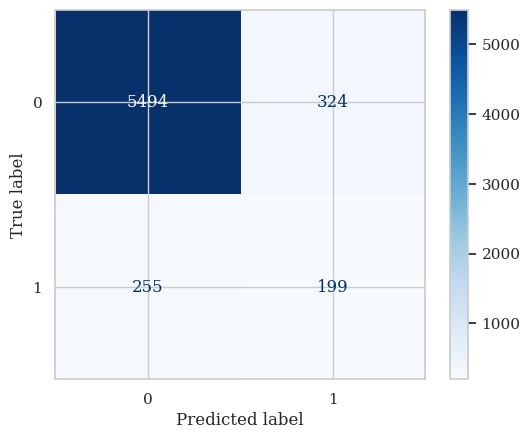

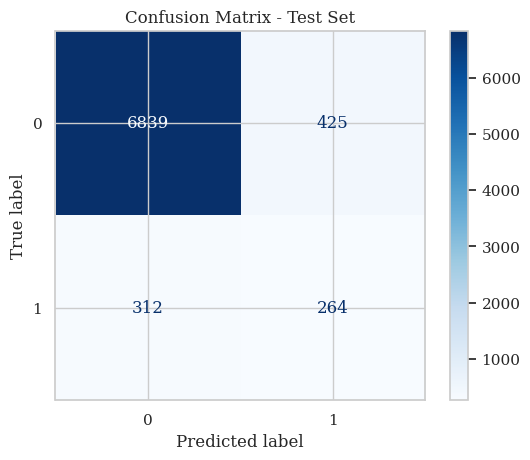

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7264
           1       0.38      0.46      0.42       576

    accuracy                           0.91      7840
   macro avg       0.67      0.70      0.68      7840
weighted avg       0.91      0.91      0.91      7840



In [30]:
# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [1000, 1500, 2000],
    'max_depth': [3, 5, None],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}

xgb_cls = XGBClassifier(
    random_state=42,
    eval_metric = 'logloss'
)


random_search = RandomizedSearchCV(
    estimator=xgb_cls,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    n_jobs=4,
    cv=5,
    verbose=1,
    random_state=42
)

random_search.fit(X_train_cls_scaled, y_train_cls, sample_weight=sample_weights)

# Save the best model
joblib.dump(random_search.best_estimator_, 'xgb_cls_model_accuracy_all_features.joblib')
best_model = joblib.load('xgb_cls_model_accuracy_all_features.joblib')

# Predict on validation set
y_pred_val = random_search.best_estimator_.predict(X_val_cls_scaled)

print("Best parameters:", random_search.best_params_)
print("Validation recall:", recall_score(y_val_cls, y_pred_val))
print("Validation accuracy:", accuracy_score(y_val_cls, y_pred_val))

# Get feature importances from the best XGBClassifier model (random_search.best_estimator_)
cls_feature_importances = best_model.feature_importances_
cls_feature_names = X_train_cls.columns

# Create a DataFrame for visualization
cls_feat_imp_df = pd.DataFrame({
    'feature': cls_feature_names,
    'importance': cls_feature_importances
}).sort_values(by='importance', ascending=False)

# Plot the top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(data=cls_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')
plt.title('Top 15 Feature Importances from XGBClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Predict on validation set
y_pred_val_cls = best_model.predict(X_val_cls_scaled)

# Confusion matrix
cm = confusion_matrix(y_val_cls, y_pred_val_cls)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_search.best_estimator_.classes_)
disp.plot(cmap='Blues')
print("Confusion Matrix:")
print(cm)

# Classification report
report = classification_report(y_val_cls, y_pred_val_cls)
print("Classification Report:")
print(report)

test_data = pd.read_csv('test_modifed.csv')

# Load the trained XGBClassifier model
xgb_cls_loaded = joblib.load('xgb_cls_model_accuracy_all_features.joblib')

# Generate test X data by dropping 'customer_id' and 'day_group' columns if present
test_X = test_data.drop(columns=[col for col in ['customer_id', 'y_encoded'] if col in test_data.columns])

# Predict classification results
test_data['y_pred'] = xgb_cls_loaded.predict(scaler2.transform(test_X))

# Compute confusion matrix and classification report for test set
cm_test = confusion_matrix(test_data['y_encoded'], test_data['y_pred'])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
disp_test.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()

# Print classification report
report_test = classification_report(test_data['y_encoded'], test_data['y_pred'])
print("Classification Report - Test Set:")
print(report_test)

### Using AOC

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.7, 'n_estimators': 1500, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
Validation recall: 0.8237885462555066
Validation accuracy: 0.8411989795918368


C:\Users\samar\AppData\Local\Temp\ipykernel_35168\2105114150.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cls_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')


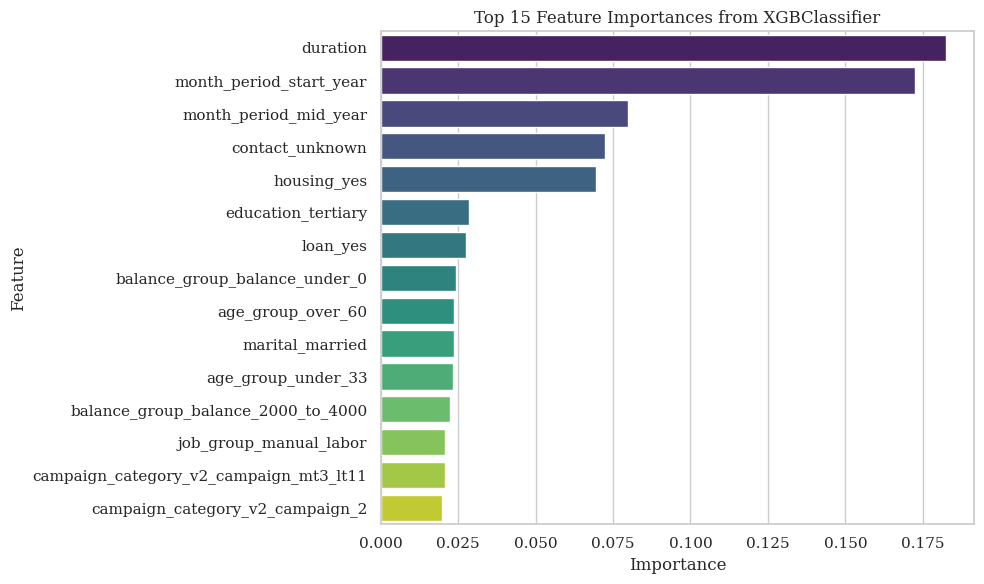

Confusion Matrix:
[[4902  916]
 [  80  374]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      5818
           1       0.29      0.82      0.43       454

    accuracy                           0.84      6272
   macro avg       0.64      0.83      0.67      6272
weighted avg       0.93      0.84      0.87      6272



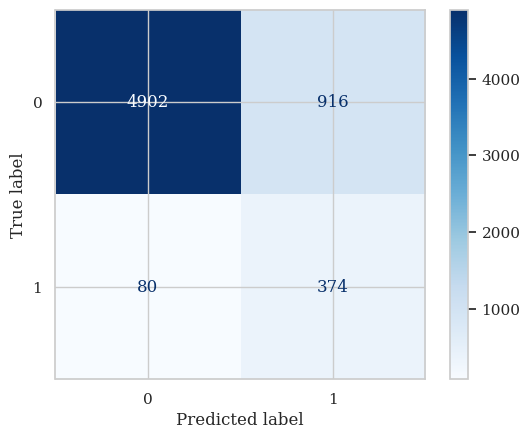

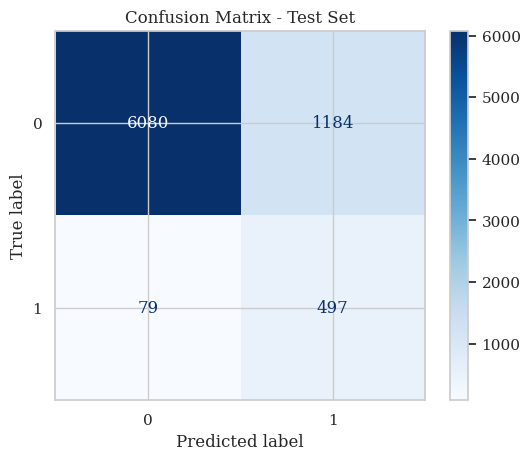

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      7264
           1       0.30      0.86      0.44       576

    accuracy                           0.84      7840
   macro avg       0.64      0.85      0.67      7840
weighted avg       0.94      0.84      0.87      7840



In [31]:
# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [1000, 1500, 2000],
    'max_depth': [3, 5, None],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}

xgb_cls = XGBClassifier(
    random_state=42,
    eval_metric = 'auc'
)


random_search = RandomizedSearchCV(
    estimator=xgb_cls,
    param_distributions=param_dist,
    n_iter=50,
    scoring='roc_auc',
    n_jobs=4,
    cv=5,
    verbose=1,
    random_state=42
)

random_search.fit(X_train_cls_scaled, y_train_cls, sample_weight=sample_weights)

# Save the best model
joblib.dump(random_search.best_estimator_, 'xgb_cls_model_auc_all_features.joblib')
best_model = joblib.load('xgb_cls_model_auc_all_features.joblib')

# Predict on validation set
y_pred_val = random_search.best_estimator_.predict(X_val_cls_scaled)

print("Best parameters:", random_search.best_params_)
print("Validation recall:", recall_score(y_val_cls, y_pred_val))
print("Validation accuracy:", accuracy_score(y_val_cls, y_pred_val))

# Get feature importances from the best XGBClassifier model (random_search.best_estimator_)
cls_feature_importances = best_model.feature_importances_
cls_feature_names = X_train_cls.columns

# Create a DataFrame for visualization
cls_feat_imp_df = pd.DataFrame({
    'feature': cls_feature_names,
    'importance': cls_feature_importances
}).sort_values(by='importance', ascending=False)

# Plot the top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(data=cls_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')
plt.title('Top 15 Feature Importances from XGBClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Predict on validation set
y_pred_val_cls = best_model.predict(X_val_cls_scaled)

# Confusion matrix
cm = confusion_matrix(y_val_cls, y_pred_val_cls)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_search.best_estimator_.classes_)
disp.plot(cmap='Blues')
print("Confusion Matrix:")
print(cm)

# Classification report
report = classification_report(y_val_cls, y_pred_val_cls)
print("Classification Report:")
print(report)

test_data = pd.read_csv('test_modifed.csv')

# Load the trained XGBClassifier model
xgb_cls_loaded = joblib.load('xgb_cls_model_auc_all_features.joblib')

# Generate test X data by dropping 'customer_id' and 'day_group' columns if present
test_X = test_data.drop(columns=[col for col in ['customer_id', 'y_encoded'] if col in test_data.columns])

# Predict classification results
test_data['y_pred'] = xgb_cls_loaded.predict(scaler2.transform(test_X))

# Compute confusion matrix and classification report for test set
cm_test = confusion_matrix(test_data['y_encoded'], test_data['y_pred'])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
disp_test.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()

# Print classification report
report_test = classification_report(test_data['y_encoded'], test_data['y_pred'])
print("Classification Report - Test Set:")
print(report_test)

#### Random oversampling

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.7, 'n_estimators': 1000, 'max_depth': None, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0}
Validation recall: 0.42290748898678415
Validation accuracy: 0.9095982142857143


C:\Users\samar\AppData\Local\Temp\ipykernel_35168\928747744.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cls_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')


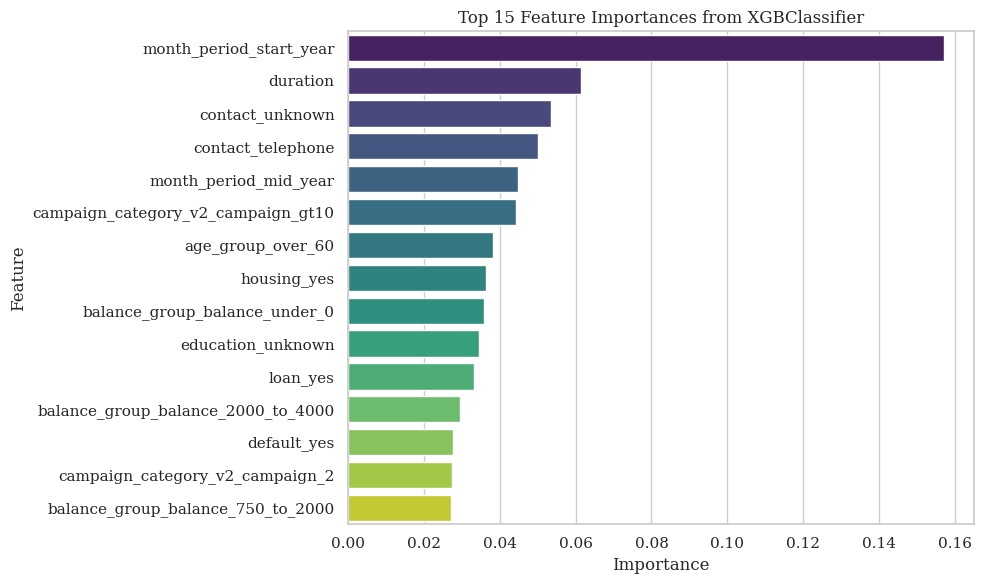

Confusion Matrix:
[[5513  305]
 [ 262  192]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5818
           1       0.39      0.42      0.40       454

    accuracy                           0.91      6272
   macro avg       0.67      0.69      0.68      6272
weighted avg       0.91      0.91      0.91      6272



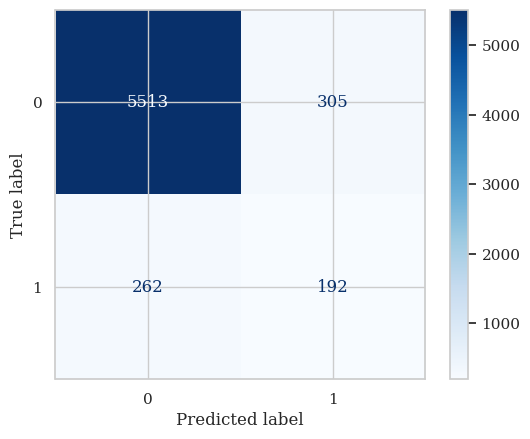

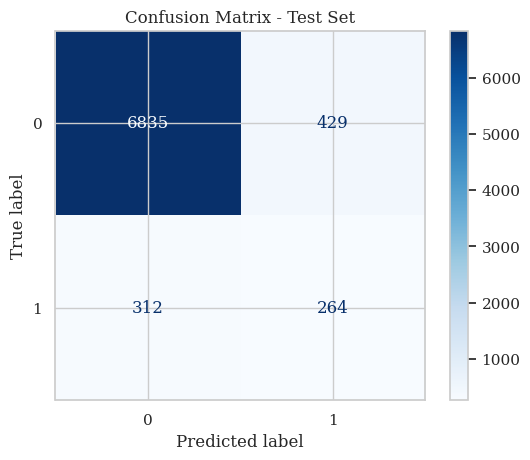

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7264
           1       0.38      0.46      0.42       576

    accuracy                           0.91      7840
   macro avg       0.67      0.70      0.68      7840
weighted avg       0.91      0.91      0.91      7840



In [32]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Random oversampling to balance the classes
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_cls_scaled, y_train_cls)

param_dist = {
    'n_estimators': [1000, 1500, 2000],
    'max_depth': [3, 5, None],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}


# Redefine the classifier (no need for scale_pos_weight after balancing)
xgb_cls_ros = XGBClassifier(
    random_state=42,
    eval_metric = 'logloss'
)

# RandomizedSearchCV with recall as the scoring metric
random_search_ros = RandomizedSearchCV(
    estimator=xgb_cls_ros,
    param_distributions=param_dist,
    n_iter=50,
    scoring='recall',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=4
)

random_search_ros.fit(X_train_ros, y_train_ros)

# Save the best model
joblib.dump(random_search_ros.best_estimator_, 'xgb_cls_model_oversampling_all_features.joblib')
best_model = joblib.load('xgb_cls_model_oversampling_all_features.joblib')

# Predict on validation set
y_pred_val = best_model.predict(X_val_cls_scaled)

print("Best parameters:", random_search_ros.best_params_)
print("Validation recall:", recall_score(y_val_cls, y_pred_val))
print("Validation accuracy:", accuracy_score(y_val_cls, y_pred_val))

# Get feature importances from the best XGBClassifier model (random_search.best_estimator_)
cls_feature_importances = best_model.feature_importances_
cls_feature_names = X_train_cls.columns

# Create a DataFrame for visualization
cls_feat_imp_df = pd.DataFrame({
    'feature': cls_feature_names,
    'importance': cls_feature_importances
}).sort_values(by='importance', ascending=False)

# Plot the top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(data=cls_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')
plt.title('Top 15 Feature Importances from XGBClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Predict on validation set
y_pred_val_cls = best_model.predict(X_val_cls_scaled)

# Confusion matrix
cm = confusion_matrix(y_val_cls, y_pred_val_cls)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_search_ros.best_estimator_.classes_)
disp.plot(cmap='Blues')
print("Confusion Matrix:")
print(cm)

# Classification report
report = classification_report(y_val_cls, y_pred_val_cls)
print("Classification Report:")
print(report)

test_data = pd.read_csv('test_modifed.csv')

# Load the trained XGBClassifier model
xgb_cls_loaded = joblib.load('xgb_cls_model_oversampling_all_features.joblib')

# Generate test X data by dropping 'customer_id' and 'day_group' columns if present
test_X = test_data.drop(columns=[col for col in ['customer_id', 'y_encoded'] if col in test_data.columns])

# Predict classification results
test_data['y_pred'] = xgb_cls_loaded.predict(scaler2.transform(test_X))

# Compute confusion matrix and classification report for test set
cm_test = confusion_matrix(test_data['y_encoded'], test_data['y_pred'])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
disp_test.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()

# Print classification report
report_test = classification_report(test_data['y_encoded'], test_data['y_pred'])
print("Classification Report - Test Set:")
print(report_test)

#### SMOTE

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.7, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 1.0}
Validation recall: 0.6321585903083701
Validation accuracy: 0.9001913265306123


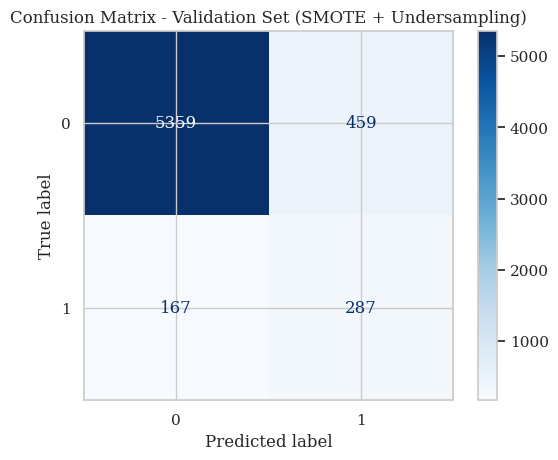

Classification Report - Validation Set (SMOTE + Undersampling):
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      5818
           1       0.38      0.63      0.48       454

    accuracy                           0.90      6272
   macro avg       0.68      0.78      0.71      6272
weighted avg       0.93      0.90      0.91      6272



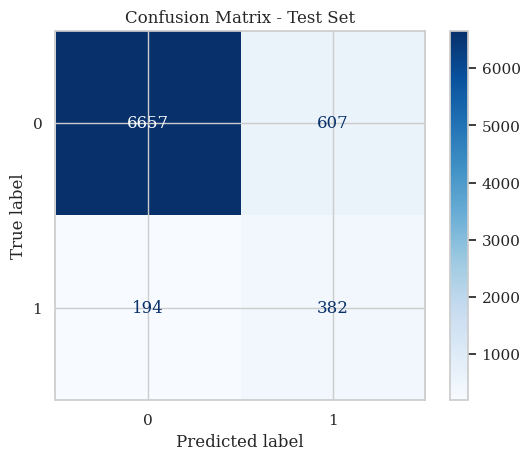

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      7264
           1       0.39      0.66      0.49       576

    accuracy                           0.90      7840
   macro avg       0.68      0.79      0.72      7840
weighted avg       0.93      0.90      0.91      7840



In [33]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import joblib

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_cls_scaled, y_train_cls)

# Apply random undersampling to the majority class after SMOTE
rus = RandomUnderSampler(random_state=42)
X_train_smote_undersampled, y_train_smote_undersampled = rus.fit_resample(X_train_smote, y_train_smote)

# Define parameter grid for RandomizedSearchCV
param_dist_smote_under = {
    'n_estimators': [1000, 1500, 2000],
    'max_depth': [3, 5, None],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}

xgb_cls_smote_under = XGBClassifier(
    random_state=42,
    eval_metric='logloss'
)

random_search_smote_under = RandomizedSearchCV(
    estimator=xgb_cls_smote_under,
    param_distributions=param_dist_smote_under,
    n_iter=50,
    scoring='recall',
    n_jobs=4,
    cv=5,
    verbose=1,
    random_state=42
)

random_search_smote_under.fit(X_train_smote_undersampled, y_train_smote_undersampled)

# Save the best model
joblib.dump(random_search_smote_under.best_estimator_, 'xgb_cls_model_smote_undersampled_all_features.joblib')
best_model_smote_under = joblib.load('xgb_cls_model_smote_undersampled_all_features.joblib')

# Predict on validation set
y_pred_val_smote_under = best_model_smote_under.predict(X_val_cls_scaled)

print("Best parameters:", random_search_smote_under.best_params_)
print("Validation recall:", recall_score(y_val_cls, y_pred_val_smote_under))
print("Validation accuracy:", accuracy_score(y_val_cls, y_pred_val_smote_under))

# Confusion matrix and classification report for validation set
cm_val_smote_under = confusion_matrix(y_val_cls, y_pred_val_smote_under)
disp_val_smote_under = ConfusionMatrixDisplay(confusion_matrix=cm_val_smote_under, display_labels=[0, 1])
disp_val_smote_under.plot(cmap='Blues')
plt.title("Confusion Matrix - Validation Set (SMOTE + Undersampling)")
plt.show()
print("Classification Report - Validation Set (SMOTE + Undersampling):")
print(classification_report(y_val_cls, y_pred_val_smote_under))

test_data = pd.read_csv('test_modifed.csv')

# Load the trained XGBClassifier model
xgb_cls_loaded = joblib.load('xgb_cls_model_smote_undersampled_all_features.joblib')

# Generate test X data by dropping 'customer_id' and 'day_group' columns if present
test_X = test_data.drop(columns=[col for col in ['customer_id', 'y_encoded'] if col in test_data.columns])

# Predict classification results
test_data['y_pred'] = xgb_cls_loaded.predict(scaler2.transform(test_X))

# Compute confusion matrix and classification report for test set
cm_test = confusion_matrix(test_data['y_encoded'], test_data['y_pred'])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
disp_test.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()

# Print classification report
report_test = classification_report(test_data['y_encoded'], test_data['y_pred'])
print("Classification Report - Test Set:")
print(report_test)